In [1017]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

Read the entire collection 

In [1018]:
from codecs import open
from __future__ import division
def read_doc(doc_file):
  docs = []
  labels = []
  with open(doc_file, encoding='utf-8') as f:
    for line in f:
         words = line.strip().split()
         if len(words) > 3:
            docs.append(words[3:])
            labels.append(words[1])
         print(words)
  return docs,labels

In [1019]:
all_docs, all_labels = read_doc('all_sentiment_shuffled.txt')

['{\\rtf1\\ansi\\ansicpg1252\\cocoartf2636']
['\\cocoatextscaling0\\cocoaplatform0{\\fonttbl\\f0\\fmodern\\fcharset0', 'Courier;}']
['{\\colortbl;\\red255\\green255\\blue255;\\red0\\green0\\blue0;}']
['{\\*\\expandedcolortbl;;\\cssrgb\\c0\\c0\\c0;}']
['\\margl1440\\margr1440\\vieww28600\\viewh14900\\viewkind0']
['\\deftab720']
['\\pard\\pardeftab720\\partightenfactor0']
[]
['\\f0\\fs24', '\\cf2', '\\expnd0\\expndtw0\\kerning0']
['music', 'neg', '241.txt', 'i', 'bought', 'this', 'album', 'because', 'i', 'loved', 'the', 'title', 'song', '.', 'it', "'s", 'such', 'a', 'great', 'song', ',', 'how', 'bad', 'can', 'the', 'rest', 'of', 'the', 'album', 'be', ',', 'right', '?', 'well', ',', 'the', 'rest', 'of', 'the', 'songs', 'are', 'just', 'filler', 'and', 'are', "n't", 'worth', 'the', 'money', 'i', 'paid', 'for', 'this', '.', 'it', "'s", 'either', 'shameless', 'bubblegum', 'or', 'oversentimentalized', 'depressing', 'tripe', '.', 'kenny', 'chesney', 'is', 'a', 'popular', 'artist', 'and', 'as', 

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



['dvd', 'neg', '925.txt', 'it', 'is', 'not', 'good', 'as', 'a', 'mainstream', 'movie', ',', 'it', 'does', 'not', 'have', 'a', 'good', 'plot', ',', 'some', 'scenes', 'are', 'not', 'relevant', '.', 'even', 'as', 'a', 'soft-porn', 'movie', ',', 'it', 'does', 'not', 'do', 'a', 'good', 'job', '.', 'try', 'watching', '"', 'i', 'like', 'to', 'play', 'games', '"', ',', 'its', 'a', 'much', 'better', 'soft-porn', 'movie', '.', '\\']
['music', 'neg', '673.txt', 'i', 'am', 'wondering', 'when', 'this', 'plague', 'will', 'be', 'over...', '.', 'and', 'when', 'we', "'ll", 'be', 'set', 'free', 'to', 'listen', 'to', 'real', 'music..', '.', 'we', 'all', 'are', 'so', 'tired', 'of', 'her', '\\']
['camera', 'neg', '180.txt', '1', 'year', 'old..', '.', '3', 'e18', 'errors', '2', 'battery', 'erros', 'shipped', 'back', 'for', 'service', '4', 'times', '!', 'search', 'the', 'net', 'for', 'e18', 'before', 'you', 'buy', '!', '\\']
['camera', 'pos', '105.txt', 'fast', 'delivery', ',', 'great', 'price', '.', 'i', 'w

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Converting the tokenize data into a sentence

In [1020]:
string = []
for text in all_docs:
  liststring = ' '.join([str(elem) for elem in text])
  string.append(liststring)

In [1021]:
df = pd.DataFrame({'label':all_labels,'document':string})
df

label                                           document
0       neg  i bought this album because i loved the title ...
1       neg  i was misled and thought i was buying the enti...
2       neg  i have introduced many of my ell , high school...
3       pos  anything you purchase in the left behind serie...
4       pos  i loved these movies , and i cant wiat for the...
...     ...                                                ...
11909   neg  the story here dose n't matter . the main char...
11910   pos  i liked everything about this product except i...
11911   pos  this flash is the perfect back-up for a studio...
11912   neg  i had boughten this as a gift which turned out...
11913   neg  the pedometer arrive held prisoner in a diffic...

[11914 rows x 2 columns]

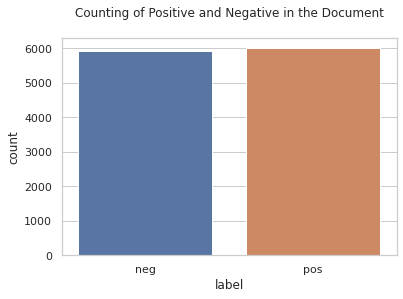

In [1022]:
#number of positive and negative labels
sns.set(style="whitegrid")
ax = sns.countplot(x='label', data=df).set_title("Counting of Positive and Negative in the Document\n")

In [1023]:
import string
updatDocs = []
for item in df.document:
  data = item
  data_new = [char for char in data if char not in string.punctuation]
  data_new=''.join(data_new)
  updatDocs.append(data_new)
df.document = updatDocs
df

label                                           document
0       neg  i bought this album because i loved the title ...
1       neg  i was misled and thought i was buying the enti...
2       neg  i have introduced many of my ell  high school ...
3       pos  anything you purchase in the left behind serie...
4       pos  i loved these movies  and i cant wiat for the ...
...     ...                                                ...
11909   neg  the story here dose nt matter  the main charac...
11910   pos  i liked everything about this product except i...
11911   pos  this flash is the perfect backup for a studio ...
11912   neg  i had boughten this as a gift which turned out...
11913   neg  the pedometer arrive held prisoner in a diffic...

[11914 rows x 2 columns]

In [1024]:
vectorizer = CountVectorizer(stop_words='english')
all_freature = vectorizer.fit_transform(df.document)
print("\nVectorizer vocab:",vectorizer.vocabulary_)


Vectorizer vocab: {'bought': 6930, 'album': 2791, 'loved': 28272, 'title': 48022, 'song': 44144, 'great': 21185, 'bad': 5036, 'rest': 39861, 'right': 40282, 'songs': 44158, 'just': 26102, 'filler': 18456, 'nt': 32803, 'worth': 52593, 'money': 30891, 'paid': 34355, 'shameless': 42573, 'bubblegum': 7477, 'oversentimentalized': 34164, 'depressing': 13288, 'tripe': 48803, 'kenny': 26311, 'chesney': 9171, 'popular': 36278, 'artist': 4172, 'result': 39903, 'cookie': 11197, 'cutter': 12278, 'category': 8576, 'nashville': 31746, 'music': 31477, 'scene': 41529, 'gotta': 20956, 'pump': 37712, 'albums': 2804, 'record': 38832, 'company': 10386, 'lining': 27796, 'pockets': 36034, 'suckers': 45954, 'buying': 7812, 'garbage': 20076, 'perpetuate': 35216, 'coming': 10267, 'town': 48383, 'll': 27957, 'soapbox': 43928, 'country': 11520, 'really': 38573, 'needs': 31927, 'roots': 40670, 'stop': 45404, 'pop': 36242, 'nonsense': 32557, 'considered': 10904, 'mainstream': 28804, 'different': 13758, 'things': 

In [1025]:
y= df.label
X= all_freature

Splitting the Data into Train Set and Test *Set*

In [1026]:
split_point = int(0.80*len(y))
train_docs = X[:split_point]
train_labels = y[:split_point]  
eval_docs = X[split_point:]
eval_labels = y[split_point:]

In [1027]:
train_docs.shape

(9531, 53311)

In [1028]:
# Sentiment classifier using NaiveBayes
model = MultinomialNB()
naive_bayes_classifier = model.fit(train_docs, train_labels)

# Predict class labels using the learner function
predict = model.predict_proba(train_docs)
print("Probability of trained class:\n",predict)

Probability of trained class:
 [[9.99999882e-01 1.17566845e-07]
 [8.63207899e-01 1.36792101e-01]
 [6.75724429e-02 9.32427557e-01]
 ...
 [9.99934238e-01 6.57622300e-05]
 [1.67902071e-09 9.99999998e-01]
 [9.63177764e-01 3.68222360e-02]]


In [1029]:
#compute the logarithm of the probability 
predict_log = model.predict_log_proba(train_docs)
print("\nLogarithmic Probability of trained class:\n",predict_log)


Logarithmic Probability of trained class:
 [[-1.17566856e-07 -1.59562588e+01]
 [-1.47099714e-01 -1.98929302e+00]
 [-2.69455503e+00 -6.99638172e-02]
 ...
 [-6.57643924e-05 -9.62946490e+00]
 [-2.02050551e+01 -1.67904091e-09]
 [-3.75172903e-02 -3.30165338e+00]]


In [1030]:
Predict_y = model.predict(eval_docs)
print(Predict_y)

['neg' 'pos' 'neg' ... 'pos' 'neg' 'neg']


In [1031]:
example = ['I love shopping on this site!',
           'Contacted customer support and was informed of certain other "criteria" that was never initially stated.',
           'I received a package today from this site that was atrocious.',
           'I am extremely happy with this site']

In [1032]:
doc_matrix = vectorizer.transform(example)

In [1033]:
model.predict(doc_matrix)

array(['pos', 'neg', 'neg', 'pos'], dtype='<U3')

In [1034]:
nr_correct = (eval_labels == Predict_y).sum()
print('{} documents classified correctly'.format(nr_correct))

1925 documents classified correctly


In [1035]:
nr_incorrect = eval_labels.size - nr_correct
print('Number of documents incorrectly classified is {}'.format(nr_incorrect))

Number of documents incorrectly classified is 458


In [1036]:
accuracy = nr_correct / (nr_correct + nr_incorrect)
print('The testing accuracy of the model is {:.2%}'.format(accuracy))

The testing accuracy of the model is 80.78%


In [1037]:
example2 = ["I like this site", 
            "I didn't enjoy movie"] 
doc_matrix2 = vectorizer.transform(example2)
model.predict(doc_matrix2)

array(['neg', 'pos'], dtype='<U3')

              precision    recall  f1-score      support
negative       0.810289  0.819512  0.814875  1230.000000
positive       0.805092  0.795317  0.800175  1153.000000
accuracy       0.807805  0.807805  0.807805     0.807805
macro avg      0.807691  0.807414  0.807525  2383.000000
weighted avg   0.807775  0.807805  0.807762  2383.000000


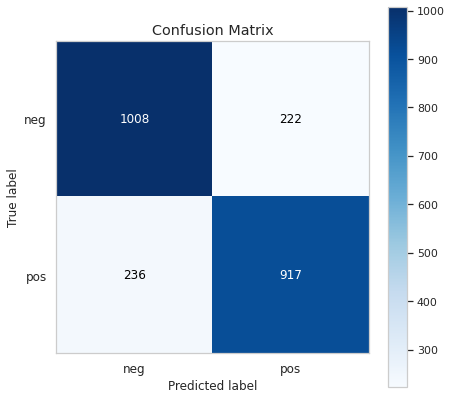

In [1038]:
!pip install scikit-plot
import scikitplot as skplt
target_labels = ['negative', 'positive']
# Confusion Matrix
naive_bayes_results = classification_report(eval_labels, Predict_y, target_names=target_labels, output_dict=True)
results_df = pd.DataFrame(naive_bayes_results).transpose()
print(results_df)
skplt.metrics.plot_confusion_matrix(eval_labels, Predict_y, figsize=(7,7))

In [1039]:
from sklearn.model_selection import KFold, cross_val_score
from numpy import sqrt
# define evaluation procedure
cv1 = KFold(n_splits=10, random_state=1, shuffle=True)
# evaluate model
scores1 = cross_val_score(model,train_docs,train_labels,scoring='accuracy', cv=cv1, n_jobs=-1)
for i in range(0, len(scores1)):
  print("Cross validation for k={0}: {1: 0.2f}".format(i, scores1[i]))

#accuracy of model with cross validation 
print ('\nAccuracy of Model with Cross Validation is: %s' % round((scores1[i]*100),2))

#interval estimate 
interval = 1.96 * sqrt( (scores1 * (1 - scores1)) / 9531)
print("\n95% confidence interval is:\n ", interval)

Cross validation for k=0:  0.77
Cross validation for k=1:  0.81
Cross validation for k=2:  0.80
Cross validation for k=3:  0.80
Cross validation for k=4:  0.81
Cross validation for k=5:  0.79
Cross validation for k=6:  0.80
Cross validation for k=7:  0.81
Cross validation for k=8:  0.80
Cross validation for k=9:  0.81

Accuracy of Model with Cross Validation is: 81.01

95% confidence interval is:
  [0.00841593 0.00787484 0.0080838  0.00795698 0.00790797 0.00812995
 0.00798921 0.00790797 0.00806825 0.00787484]
